<a href="https://colab.research.google.com/github/henrynguyen13/gen_ai/blob/main/Basic_NNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
#Create a Model Class that inherits nn.Module
class Model(nn.Module):
    #Input layer (4 features of Iris flower) --> Hidden Layer 1 (number of neurons) --> H2(n) --> Output (3 classes of Iris flowers)
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [3]:
#Pick a manual seed for randomization
torch.manual_seed(41)

#Create an instance of model
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
url="https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = pd.read_csv(url)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [13]:
df['species'] = df['species'].replace({'setosa':0.0, 'versicolor':1.0, 'virginica':2.0})
df

<ipython-input-13-029dd9b49bd8>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace({'setosa':0.0, 'versicolor':1.0, 'virginica':2.0})


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [17]:
#Train test split X,y
#.values => Convert to numpy arrays
X = df.drop('species', axis=1).values
y = df['species'].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [20]:
#Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

#Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [19]:
#Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
#Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epoch))
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


epochs: Số lần lặp lại toàn bộ dữ liệu huấn luyện qua mô hình. Khi tăng epochs, mô hình có cơ hội tối ưu hóa nhiều hơn bằng cách điều chỉnh các tham số cho mỗi lần lặp. Tuy nhiên, nếu epochs quá lớn, mô hình có thể dẫn đến overfitting (học quá mức) trên dữ liệu huấn luyện.

optimizer.zero_grad(): Đặt lại gradient của tất cả tham số về 0. Mỗi epoch, gradient cần được đặt lại để tránh cộng dồn gradient từ các epoch trước đó.

loss.backward(): Tính toán gradient của hàm mất mát đối với các tham số của mô hình. Đây là quá trình tính gradient của loss dựa trên các trọng số của mô hình, một bước quan trọng trong việc sử dụng thuật toán Gradient Descent.

optimizer.step(): Cập nhật các tham số của mô hình bằng cách sử dụng các gradient vừa tính toán và tốc độ học (learning rate). Adam Optimizer sẽ thực hiện việc điều chỉnh các tham số của mô hình để giảm giá trị loss.

In [21]:
from math import e
#Train model
#Epoch
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())

    if i % 10 == 0:
        print(f'Epoch: {i} Loss: {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 Loss: 1.1251550912857056
Epoch: 10 Loss: 1.0096259117126465
Epoch: 20 Loss: 0.8157405853271484
Epoch: 30 Loss: 0.585706353187561
Epoch: 40 Loss: 0.3999636471271515
Epoch: 50 Loss: 0.26768800616264343
Epoch: 60 Loss: 0.17942361533641815
Epoch: 70 Loss: 0.12151690572500229
Epoch: 80 Loss: 0.0860118493437767
Epoch: 90 Loss: 0.06520850956439972


range(epochs) tạo ra một chuỗi giá trị từ 0 đến epochs - 1

Text(0.5, 0, 'Epoch')

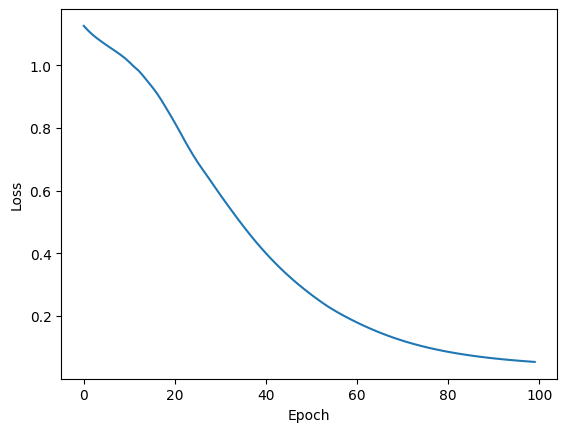

In [24]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

 Câu lệnh torch.no_grad() tắt tính toán gradient (backpropagation) trong khối mã bên trong. Khi huấn luyện mô hình, tính toán gradient là cần thiết để cập nhật các trọng số. Tuy nhiên, khi đánh giá hoặc dự đoán, tính toán gradient không còn cần thiết và việc tắt nó giúp tiết kiệm bộ nhớ và tăng tốc độ thực thi.

In [25]:
#Evaluate Model on Test Dataset (validate model on test set)
with torch.no_grad(): #Basically turn offback propogation
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [26]:
loss

tensor(0.1315)

In [28]:
correct=0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1:2}. {str(data):25} {y_val.argmax().item()}')

        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. tensor([6.0000, 2.2000, 5.0000, 1.5000]) 2
 2. tensor([6.4000, 2.8000, 5.6000, 2.1000]) 2
 3. tensor([7.7000, 3.0000, 6.1000, 2.3000]) 2
 4. tensor([6.1000, 3.0000, 4.6000, 1.4000]) 1
 5. tensor([6.8000, 3.0000, 5.5000, 2.1000]) 2
 6. tensor([6.1000, 2.8000, 4.0000, 1.3000]) 1
 7. tensor([6.3000, 2.7000, 4.9000, 1.8000]) 2
 8. tensor([6.0000, 3.4000, 4.5000, 1.6000]) 1
 9. tensor([6.5000, 3.0000, 5.2000, 2.0000]) 2
10. tensor([6.8000, 3.2000, 5.9000, 2.3000]) 2
11. tensor([6.1000, 3.0000, 4.9000, 1.8000]) 2
12. tensor([5.1000, 3.4000, 1.5000, 0.2000]) 0
13. tensor([4.4000, 3.0000, 1.3000, 0.2000]) 0
14. tensor([5.0000, 2.3000, 3.3000, 1.0000]) 1
15. tensor([5.1000, 3.3000, 1.7000, 0.5000]) 0
16. tensor([6.3000, 2.8000, 5.1000, 1.5000]) 1
17. tensor([4.8000, 3.1000, 1.6000, 0.2000]) 0
18. tensor([6.0000, 2.7000, 5.1000, 1.6000]) 2
19. tensor([4.9000, 3.1000, 1.5000, 0.1000]) 0
20. tensor([4.5000, 2.3000, 1.3000, 0.3000]) 0
21. tensor([5.5000, 2.4000, 3.7000, 1.0000]) 1
22. tensor([6

In [29]:
new_iris = torch.tensor([5.6, 3.7, 2.2, 0.5])

with torch.no_grad():
    print(model.forward(new_iris))
    print(model.forward(new_iris).argmax().item())

tensor([ 3.1087, -0.8498, -2.1556])
0
